In [ ]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import _pickle as cPickle
import _pickle as pickle
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack
import copy
import re
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = open("/content/drive/MyDrive/FinalUpdated_engg_removeoutlier.pickle",'rb')
df_final = pickle.load(file)
file.close()

In [ ]:
sns.countplot(x='review_score',data=df_final)
plt.title("Distribution of class")
plt.show()

In [ ]:
df_final.drop(columns='product_category_name',axis=1 ,inplace=True)
df_final.drop(columns='zip_code_prefix_seller',inplace=True,axis=1)

In [ ]:
X=df_final.drop(columns='review_score')
y=df_final['review_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [ ]:
print('Train Shape is',X_train.shape,y_train.shape)
print('Test Shape is',X_test.shape,y_test.shape)

Train Shape is (80917, 26) (80917,)
Test Shape is (34680, 26) (34680,)


In [ ]:
# for verify the proportion of class
print(Counter(y_train))
print(Counter(y_test))

Counter({5: 45406, 4: 15304, 1: 10489, 3: 6838, 2: 2880})
Counter({5: 19461, 4: 6559, 1: 4495, 3: 2930, 2: 1235})


## countvectorizer on customer_state

In [ ]:
def Count_Vector_one_hot_encoding(train,test,feature):
  vector=CountVectorizer()
  vector.fit(train[feature].values)
  train[feature+'_ohe']=vector.transform(train[feature].values)
  test[feature+'_ohe']=vector.transform(test[feature].values)
  
  # File_name=feature+"_ohe"+".pickle"
  # save_path="/content/drive/MyDrive/"+File_name
  # with open(r""+save_path, "wb") as output_file1:
  #   cPickle.dump(vector,output_file1)



In [ ]:
def RemoveChar(data,feature):
    special_char = "@_!#$%^&''*()<>?/\|}{~:;[]"
    for i in special_char:
        data[feature]=data[feature].str.replace(i, " ").replace(" ","_")
        data[feature]=data[feature].str.replace("  "," ")    
        data[feature]=data[feature].str.replace(" ","_")
    return np.unique(data[feature]) 

In [ ]:
train_val=RemoveChar(X_train,'seller_city')
test_val=RemoveChar(X_test,'seller_city')



In [ ]:
vector=CountVectorizer()
vector.fit(X_train['customer_state'].values)
X_train_customer_state_ohe=vector.transform(X_train['customer_state'].values)
X_test_customer_state_ohe=vector.transform(X_test['customer_state'].values)

with open(r"/content/drive/MyDrive/customer_state_ohe.pickle", "wb") as output_file1:
    cPickle.dump(vector,output_file1)


In [ ]:
vector=CountVectorizer()
vector.fit(X_train['order_status'].values)
X_train_order_status_ohe=vector.transform(X_train['order_status'].values)
X_test_order_status_ohe=vector.transform(X_test['order_status'].values)

with open(r"/content/drive/MyDrive/order_status_ohe.pickle", "wb") as output_file1:
    cPickle.dump(vector,output_file1)

  


In [ ]:
vector=CountVectorizer()
vector.fit(X_train['payment_type'].values)
X_train_payment_type_ohe=vector.transform(X_train['payment_type'].values)
X_test_payment_type_ohe=vector.transform(X_test['payment_type'].values)

with open(r"/content/drive/MyDrive/payment_type_ohe.pickle", "wb") as output_file1:
    cPickle.dump(vector,output_file1)

  

In [ ]:
vector=CountVectorizer()
vector.fit(X_train['seller_city'].values)
X_train_seller_city_ohe=vector.transform(X_train['seller_city'].values)
X_test_seller_city_ohe=vector.transform(X_test['seller_city'].values)

with open(r"/content/drive/MyDrive/seller_city_ohe.pickle", "wb") as output_file1:
    cPickle.dump(vector,output_file1)




In [ ]:
vector=CountVectorizer()
vector.fit(X_train['seller_state'].values)
X_train_seller_state_ohe=vector.transform(X_train['seller_state'].values)
X_test_seller_state_ohe=vector.transform(X_test['seller_state'].values)

with open(r"/content/drive/MyDrive/seller_state_ohe.pickle", "wb") as output_file1:
    cPickle.dump(vector,output_file1)

  

In [ ]:
vector=CountVectorizer()
vector.fit(X_train['product_category_name_english'].values)
X_train_product_category_name_english_ohe=vector.transform(X_train['product_category_name_english'].values)
X_test_product_category_name_english_ohe=vector.transform(X_test['product_category_name_english'].values)

with open(r"/content/drive/MyDrive/product_category_name_english_ohe.pickle", "wb") as output_file1:
    cPickle.dump(vector,output_file1)



In [ ]:
vector=CountVectorizer()
vector.fit(X_train['Month_Year_Purchase_Order'].values)
X_train_Month_Year_Purchase_Order_ohe=vector.transform(X_train['Month_Year_Purchase_Order'].values)
X_test_Month_Year_Purchase_Order_ohe=vector.transform(X_test['Month_Year_Purchase_Order'].values)

with open(r"/content/drive/MyDrive/Month_Year_Purchase_Order_ohe.pickle", "wb") as output_file1:
    cPickle.dump(vector,output_file1)



In [ ]:
vector=CountVectorizer()
vector.fit(X_train['Month_year_order_deliverd'].values)
X_train_Month_year_order_deliverd_ohe=vector.transform(X_train['Month_year_order_deliverd'].values)
X_test_Month_year_order_deliverd_ohe=vector.transform(X_test['Month_year_order_deliverd'].values)

with open(r"/content/drive/MyDrive/Month_year_order_deliverd_ohe.pickle", "wb") as output_file1:
    cPickle.dump(vector,output_file1)



In [ ]:
#X_train[list(X_train.select_dtypes(include='number').columns)]

X_train_customer_state_ohe,X_train_order_status_ohe,X_train_payment_type_ohe,X_train_seller_city_ohe,X_train_seller_state_ohe,X_train_product_category_name_english_ohe,X_train_Month_Year_Purchase_Order_ohe,X_train_Month_year_order_deliverd_ohe
X_test_customer_state_ohe,X_test_order_status_ohe,X_test_payment_type_ohe,X_test_seller_city_ohe,X_test_seller_state_ohe,X_test_product_category_name_english_ohe,X_test_Month_Year_Purchase_Order_ohe,X_test_Month_year_order_deliverd_ohe         

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price_new,freight_value_new,product_length_cm_new,payment_value_new,Duration_delivered_Purchase_days,Delivered_Within_Estimated
87344,1,1,4.14,49.90,13.37,57.0,366.0,2.0,1650.0,30.0,22.0,30.0,9.980,5.348,3.0,0.828,9,13
81854,1,1,94.90,124.78,9.69,41.0,1797.0,1.0,1200.0,25.0,13.0,20.0,24.956,3.876,2.5,18.980,4,7
95235,1,1,51.14,29.99,21.15,40.0,361.0,3.0,150.0,18.0,3.0,16.0,89.970,48.645,12.6,306.840,22,5
14063,1,1,35.09,19.99,15.10,45.0,745.0,1.0,350.0,16.0,11.0,11.0,3.998,6.040,1.6,7.018,7,21
92571,1,1,30.00,89.00,16.32,59.0,354.0,3.0,700.0,38.0,30.0,28.0,17.800,38.170,38.0,6.000,14,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13103,1,1,30.00,40.00,16.32,59.0,956.0,1.0,50.0,16.0,16.0,17.0,120.000,34.500,11.2,180.000,10,1
34852,1,1,77.57,59.90,17.67,53.0,335.0,5.0,1800.0,30.0,13.0,30.0,11.980,7.068,3.0,15.514,12,10
76522,1,1,236.70,110.32,8.03,60.0,919.0,1.0,150.0,22.0,3.0,15.0,330.960,18.469,15.4,236.700,10,-1
42742,1,1,137.85,122.90,14.95,59.0,349.0,2.0,1550.0,30.0,10.0,30.0,24.580,5.980,3.0,27.570,3,18


In [ ]:
Stand=StandardScaler()
Col_val=list(X_train.select_dtypes(include='number').columns)
Stand.fit(X_train[Col_val])
xtrain_num=Stand.transform(X_train[Col_val])
xtest_num=Stand.transform(X_test[Col_val])

In [ ]:
with open(r"/content/drive/MyDrive/Standard_Scaler_ohe.pickle", "wb") as output_file3:
  cPickle.dump(Stand,output_file3)

In [ ]:
X_train_stack=hstack((xtrain_num,X_train_customer_state_ohe,X_train_order_status_ohe,X_train_payment_type_ohe,X_train_seller_city_ohe,X_train_seller_state_ohe,X_train_product_category_name_english_ohe,X_train_Month_Year_Purchase_Order_ohe,X_train_Month_year_order_deliverd_ohe)).tocsr()

X_test_stack=hstack((xtest_num,X_test_customer_state_ohe,X_test_order_status_ohe,X_test_payment_type_ohe,X_test_seller_city_ohe,X_test_seller_state_ohe,X_test_product_category_name_english_ohe,X_test_Month_Year_Purchase_Order_ohe,X_test_Month_year_order_deliverd_ohe)).tocsr()

In [ ]:
X_train_stack.shape

(80917, 777)

In [ ]:
with open(r"/content/drive/MyDrive/xtrain_with_ohe.pickle", "wb") as output_file3:
  cPickle.dump(X_train_stack,output_file3)

with open(r"/content/drive/MyDrive/xtest_with_ohe.pickle", "wb") as output_file3:
  cPickle.dump(X_test_stack,output_file3)  

In [ ]:
X_train_stack.shape

(80917, 777)

In [ ]:
X_test_stack.shape

(34680, 777)

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    """This function will plot confusion matrix, precision matrix and recall matrix"""
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    
    labels = [1,2,3,4,5]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [ ]:

alpha = [10 ** x for x in range(-5, 2)]

neigh = SGDClassifier(loss='log', penalty='l2',n_jobs=-1)
parameters = {'alpha':alpha}

clf = RandomizedSearchCV(neigh, parameters, cv=StratifiedKFold(5), scoring='neg_log_loss',return_train_score=True)
clf.fit(X_train_stack, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal', loss='log',
                                           max_iter=1000, n_iter_no_change=5,
                                           n_jobs=-1, penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
        

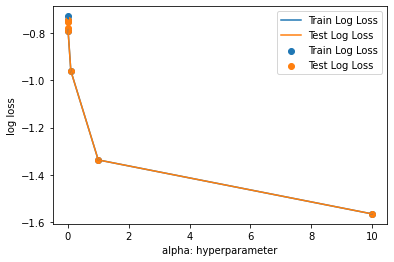

In [ ]:
result=pd.DataFrame(clf.cv_results_)
result.sort_values(['param_alpha'])
train_log_loss=result['mean_train_score']
test_log_loss=result['mean_test_score']
alpha=result['param_alpha']

plt.plot(alpha,train_log_loss,label='Train Log Loss')
plt.plot(alpha,test_log_loss,label='Test Log Loss')

plt.scatter(alpha,train_log_loss,label='Train Log Loss')
plt.scatter(alpha,test_log_loss,label='Test Log Loss')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("log loss")

plt.show()



In [ ]:
import seaborn as sns
results_data = pd.DataFrame.from_dict(clf.cv_results_)
max_scores = results_data.groupby(['param_alpha']).max()
max_scores = max_scores.unstack()[['mean_test_score', 'mean_train_score']]
# sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');

In [ ]:
max_scores


                  param_alpha
mean_test_score   0.00001        -0.77546
                  0.00010       -0.742645
                  0.00100       -0.750235
                  0.01000       -0.791053
                  0.10000       -0.959647
                  1.00000        -1.33701
                  10.00000       -1.56596
mean_train_score  0.00001       -0.749661
                  0.00010       -0.727669
                  0.00100       -0.744382
                  0.01000       -0.789115
                  0.10000       -0.959163
                  1.00000        -1.33692
                  10.00000       -1.56595
dtype: object

In [ ]:
Logistic_reg = SGDClassifier(alpha=0.0001,loss='log', penalty='l2',n_jobs=-1)
Logistic_reg.fit(X_train_stack, y_train)

print('Train F1 Score is {0}'.format(f1_score(y_train,Logistic_reg.predict(X_train_stack),average='macro')))
print('Test F1 Score is {0}'.format(f1_score(y_test,Logistic_reg.predict(X_test_stack),average='macro')))


Train F1 Score is 0.5141617663463366
Test F1 Score is 0.5059013715903419


-------------------- Confusion matrix --------------------


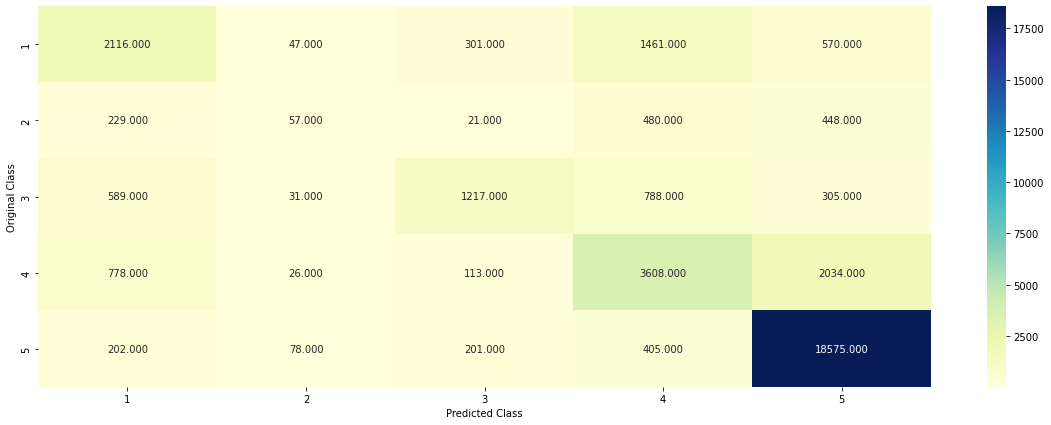

-------------------- Precision matrix (Columm Sum=1) --------------------


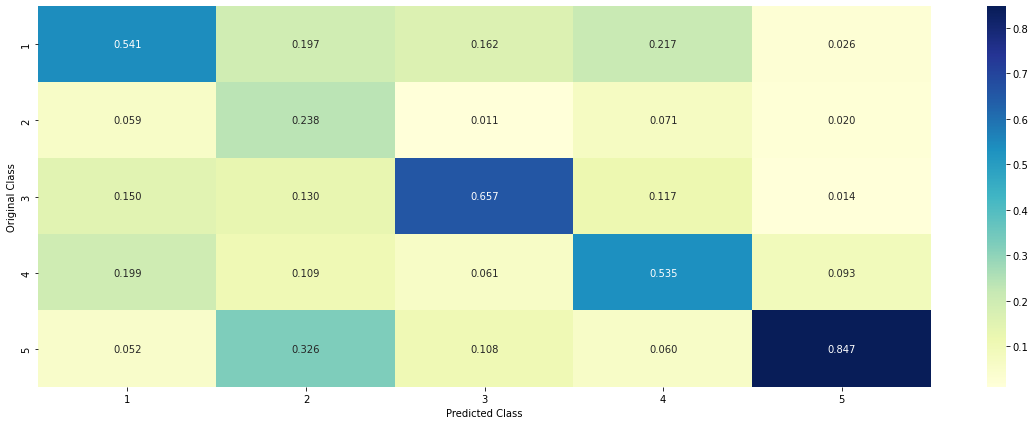

-------------------- Recall matrix (Row sum=1) --------------------


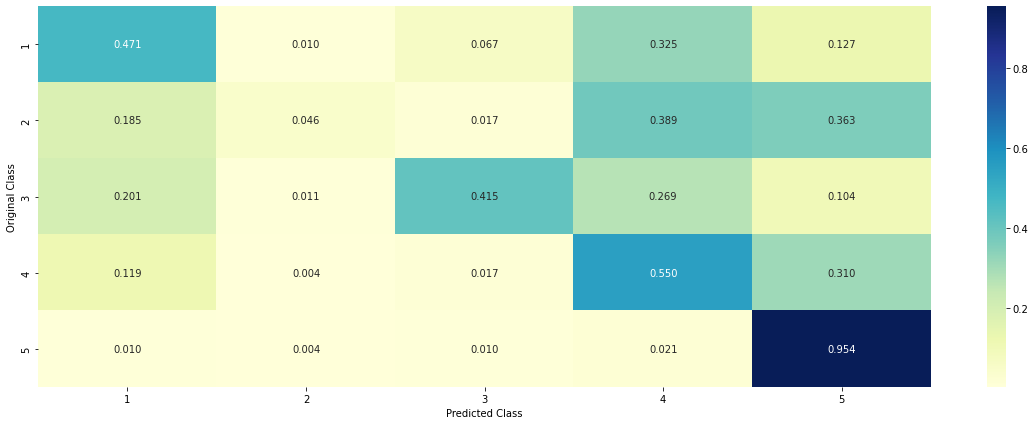

In [ ]:

predict_y=Logistic_reg.predict(X_test_stack)
plot_confusion_matrix(y_test, predict_y)

In [ ]:
def kfold(k,model,trains,y_trains):
  kf = StratifiedKFold(n_splits=k)
  train_log_loss=[]
  test_log_loss=[]
  for train_ind, test_ind in kf.split(trains,y_trains):
    x_tr,x_tst,y_tr,y_tst=trains[train_ind],trains[test_ind],y_trains.iloc[train_ind],y_trains.iloc[test_ind]
    model.fit(x_tr,y_tr)
    #use calibrated classifer because with hing loss not return probaliry score
    sig_clf = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf.fit(x_tr, y_tr)
    predict_Train = sig_clf.predict_proba(x_tr)
    predict_Test = sig_clf.predict_proba(x_tst)

    train_log_loss.append(log_loss(y_tr, predict_Train,  eps=1e-15))
    test_log_loss.append(log_loss(y_tst, predict_Test, eps=1e-15))
    
    return train_log_loss,test_log_loss

In [ ]:
alpha = [10 ** x for x in range(-5, 2)]
train_log_loss=[]
test_log_loss=[]
for i in alpha:
  SGD_linerSVM = SGDClassifier(loss='hinge', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=i)  
  train_loss,test_loss = kfold(5,SGD_linerSVM,X_train_stack,y_train)
  print('for value of alpha {0} the train loss is {1} and test loss is {2}'.format(i,train_loss,test_loss))
  train_log_loss.append(train_loss)
  test_log_loss.append(test_loss)



for value of alpha 1e-05 the train loss is [0.7603177450460483] and test loss is [0.776564351907692]
for value of alpha 0.0001 the train loss is [0.7649517065233757] and test loss is [0.7770084245043555]
for value of alpha 0.001 the train loss is [0.7822489101999045] and test loss is [0.7842981972466555]
for value of alpha 0.01 the train loss is [0.7886699568065875] and test loss is [0.7845916730719116]
for value of alpha 0.1 the train loss is [0.841781117420145] and test loss is [0.8349230482663602]
for value of alpha 1 the train loss is [0.875483253864985] and test loss is [0.8700963772247915]
for value of alpha 10 the train loss is [0.9061535278423696] and test loss is [0.901472256224771]


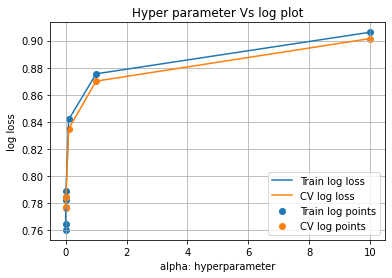

In [ ]:
train_log_loss
test_log_loss

plt.plot(alpha, train_log_loss, label='Train log loss')
plt.plot(alpha, test_log_loss, label='CV log loss')

plt.scatter(alpha, train_log_loss, label='Train log points')
plt.scatter(alpha, test_log_loss, label='CV log points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("log loss")
plt.title("Hyper parameter Vs log plot")
plt.grid()
plt.show()


In [ ]:
SGD_Svm = SGDClassifier(loss='hinge', penalty='l2',n_jobs=-1,class_weight='balanced',alpha=0.00001)
SGD_Svm.fit(X_train_stack,y_train)
sig_clf=CalibratedClassifierCV(base_estimator=SGD_Svm, method='sigmoid')
sig_clf.fit(X_train_stack,y_train)

predict_y = sig_clf.predict_proba(X_train_stack)
print('For values of best alpha = ', 0.001, "The train log loss is:",log_loss(y_train, predict_y, labels=SGD_Svm.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_stack)

print('For values of best alpha = ', 0.001, "The test log loss is:",log_loss(y_test, predict_y, labels=SGD_Svm.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)

print('F1 score for train data',f1_score(y_train,SGD_Svm.predict(X_train_stack),average="macro"))

print('F1 score for test data',f1_score(y_test,SGD_Svm.predict(X_test_stack),average="macro"))


print("Total number of data points :", len(predicted_y))

For values of best alpha =  0.001 The train log loss is: 0.7740288055314222
For values of best alpha =  0.001 The test log loss is: 0.7859802439338253
F1 score for train data 0.5130414743893298
F1 score for test data 0.49636487292066434
Total number of data points : 34680


-------------------- Confusion matrix --------------------


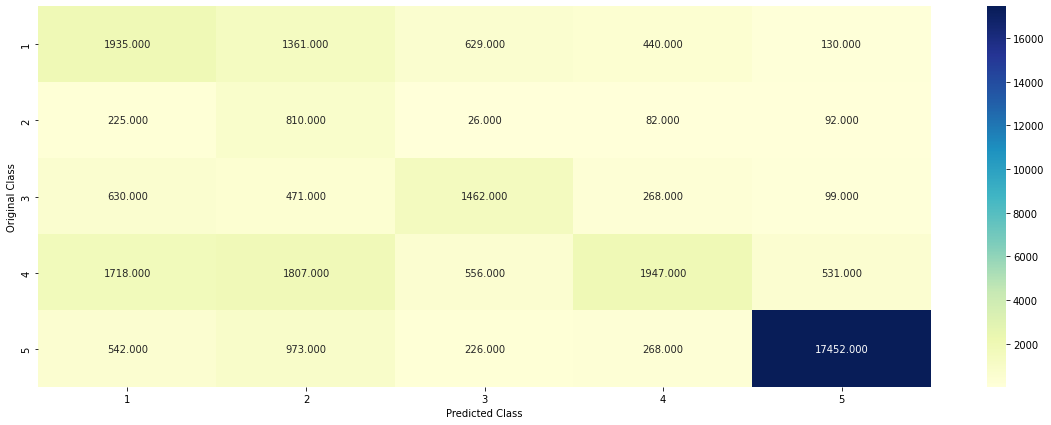

-------------------- Precision matrix (Columm Sum=1) --------------------


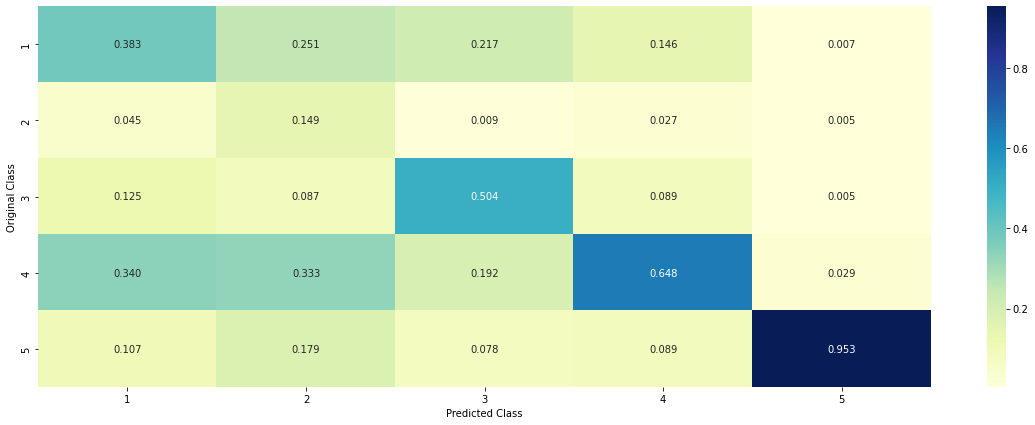

-------------------- Recall matrix (Row sum=1) --------------------


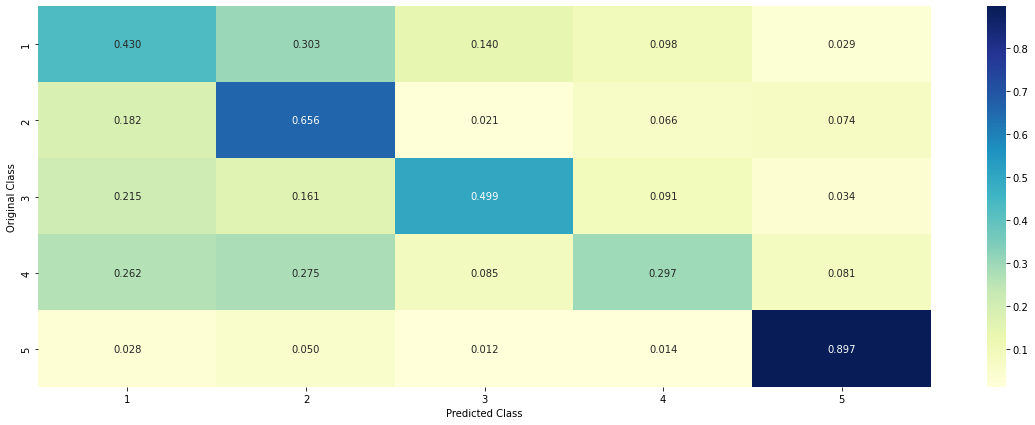

In [ ]:
predict_y=SGD_Svm.predict(X_test_stack)
plot_confusion_matrix(y_test, predict_y)

In [ ]:
with open(r"/content/drive/MyDrive/Logistic_reg_ohe.pickle", "wb") as output_file3:
  cPickle.dump(Logistic_reg,output_file3)

with open(r"/content/drive/MyDrive/SGD_Svm_ohe.pickle", "wb") as output_file3:
  cPickle.dump(SGD_Svm,output_file3)  